#  text summarization

Text Summarization do tarah ka hota hai:

Extractive Summarization → Important sentences ko select karta hai.

Abstractive Summarization → Naya summary sentence generate karta hai.



```
 i am build the extractive text summarization
```



This project focuses on text summarization using two approaches:

'''a traditional Seq2Seq model with LSTM and a Transformer-based model. The goal is to see how each model performs and understand the difference between step-by-step sequence processing and attention-based processing'''.

# Steps in the Projects:


```
1. Dataset gathering
2.dataset preprocessing
3.encoding
4.model building (two approach)
5.model evaluation
6.to fetch the live new api
7. to train the model in live new api
8. save the model
9. deploy the model
```



# 1. Dataset gathering

to collect the data in kaggle new_summary.csv

import the basic module

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
summary_dataset_path="/content/drive/MyDrive/dataset/news_summary.csv"
summary_more_dataset_path="/content/drive/MyDrive/dataset/news_summary_more.csv"
summary=pd.read_csv(summary_dataset_path,encoding='iso-8859-1')

In [33]:
summary.head(2)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."


In [34]:
summary_more=pd.read_csv(summary_more_dataset_path,encoding='iso-8859-1')

In [35]:
summary_more.head(2)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...


In [36]:
# shape of data
print(summary.shape)
print(summary_more.shape)

(4514, 6)
(98401, 2)


In [37]:
print(summary.info())
print(summary_more.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4514 entries, 0 to 4513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     4514 non-null   object
 1   date       4514 non-null   object
 2   headlines  4514 non-null   object
 3   read_more  4514 non-null   object
 4   text       4514 non-null   object
 5   ctext      4396 non-null   object
dtypes: object(6)
memory usage: 211.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98401 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98401 non-null  object
 1   text       98401 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB
None


In [38]:
summary = summary.iloc[:, 0:6]
summary_more = summary_more.iloc[:, 0:2]

summary['text'] = (
    summary['author'] + ' ' +
    summary['date'] + ' ' +
    summary['read_more'] + ' ' +
    summary['text'] + ' ' +
    summary['ctext']
)

df = pd.DataFrame()

df['text'] = pd.concat([summary_more['text'], summary['text']], ignore_index=True)
df['summary'] = pd.concat([summary_more['headlines'], summary['headlines']], ignore_index=True)

print(df.shape)
df.head(2)

(102915, 2)


,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...


In [39]:
df['text'][0]


"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [40]:
print("corresponding summary is :")
df['summary'][0]

corresponding summary is :


'upGrad learner switches to career in ML & Al with 90% salary hike'

In [41]:
print(df['text'][2],"---",df['summary'][2])

New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history. --- New Zealand end Rohit Sharma-led India's 12-match winning streak


In [42]:
df.shape

(102915, 2)

In [43]:
df.sample(3)

,text,summary
47601,Students of Jawaharlal Nehru University on Thu...,JNU students confine university officials in c...
20250,SBI's Group Economic Advisor Soumya Kanti Ghos...,Sudden depreciation or appreciation of rupee n...
91384,The 69-year-old passenger who was forcibly dra...,United reaches settlement with passenger dragg...


In [44]:
df.head(2)

,text,summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...


# Data preprocessing

# 1.lower case convert

In [45]:
import re

def clean_text(text):
    """
    - converts to lowercase
    - removes special characters
    - replaces URLs with domain names
    - reduces multiple spaces
    """
    text = str(text).lower()
    text = re.sub(r'https?://([^/\s]+).*', r'\1', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Tokenization: split text by spaces
def tokenize_texts(texts):
    return [' '.join(clean_text(t).split()) for t in texts]

# Drop null values before cleaning and tokenizing
df.dropna(inplace=True)

processed_text = tokenize_texts(df['text'])
processed_summary = ['_START_ ' + s + ' _END_' for s in tokenize_texts(df['summary'])]

df['cleaned_text'] = pd.Series(processed_text)
df['cleaned_summary'] = pd.Series(processed_summary)

In [46]:
df.head(2)

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


clean_text(t) → text cleaning function (ye lowercasing, punctuation removal, etc. karega).

.split() → text ko spaces ke hisab se words me todta hai.

' '.join(...) → fir un words ko dobara ek consistent space ke sath jodta hai.

In [47]:
df['cleaned_summary'][0]

'_START_ upgrad learner switches to career in ml al with 90 salary hike _END_'

Ye tumhare summary column ko clean karke special tokens add karta hai:

_START_ → summary ke beginning me

_END_ → summary ke end me

 Purpose of START and END tokens:

Ye decoder LSTM ko batate hain kab sequence start aur kab end hota hai.

Ye training aur prediction dono me helpful hote hain.

Model ko “where to stop generating” ka signal milta hai.

In [48]:
print(f"NaN dropped: {df.isna().sum().sum()}")

df = df.dropna(subset=['cleaned_text'])

print(df.shape)

NaN dropped: 228
(102683, 4)


In [49]:
df.head(2)

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


In [50]:
print("Max text length:", max([len(t.split()) for t in df['cleaned_text']]))
print("Max summary length:", max([len(s.split()) for s in df['summary']]))


Max text length: 5194
Max summary length: 18


In [51]:
df.head(2)

,text,summary,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...,saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


In [52]:
df.drop(['summary'],inplace=True,axis=1)

In [53]:
df.head(2)

,text,cleaned_text,cleaned_summary
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,Kunal Shah's credit card bill payment platform...,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


In [54]:
df.drop(['text'],inplace=True,axis=1)


In [55]:
df.head(2)

,cleaned_text,cleaned_summary
0,saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


In [56]:
cnt = 0
for i in df['cleaned_text']:
    if len(i.split()) <= 100:
        cnt = cnt + 1
print(f"Percentage of texts with less than 100 words : {cnt / len(df['cleaned_text'])}")


Percentage of texts with less than 100 words : 0.9988995257248036


When you build your encoder-decoder model (like LSTM, Bi-LSTM, or T5) for text summarization, you need to decide the maximum input sequence length.

This makes your model training faster and more efficient — because it won’t waste time processing unnecessarily long sequences.



```
to decode the max_len(number of token to feed the model)
```



In [57]:
import numpy as np

text_len = [len(t.split()) for t in df['cleaned_text']]
summary_len = [len(s.split()) for s in df['cleaned_summary']]

# 95th percentile cutoff
max_text_len = int(np.percentile(text_len, 95))
max_summary_len = int(np.percentile(summary_len, 95))

print("Suggested max text length:", max_text_len)
print("Suggested max summary length:", max_summary_len)


Suggested max text length: 65
Suggested max summary length: 15


Reasoning:

max_text_len = 100 → covers most of your input texts, keeps LSTM training fast.

max_summary_len = 50 → allows summaries longer than current maximum (15 words) → gives model freedom to generate longer summaries if needed in the future.

# Tokenization


Tokenization¶
This block prepares the text data for a sequence-to-sequence model:

Split dataset: Separates text and summary into training and validation sets to evaluate model performance on unseen data.

Initialize tokenizers: Converts words into integer indices, which neural networks can process.

Analyze rare words: Computes the percentage of words appearing less than thresh times to identify infrequent words that might add noise.

Limit vocabulary to frequent words: Reduces vocabulary size by ignoring rare words, which improves training efficiency and prevents overfitting.

Convert texts to sequences: Maps each word in the texts to its corresponding integer index.

Pad sequences: Ensures all sequences have the same length, necessary for batch processing in neural networks.

Compute final vocabulary size: Includes the padding token to correctly define the input dimension for the model embedding layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

Tokenizer for text

In [ ]:
print(max_text_len)

65


reset the max_text_len

In [ ]:
max_text_len = 100

In [ ]:
print(max_text_len)

100


In [ ]:
text_tokenizer = Tokenizer()
text_tokenizer.fit_on_texts(df['cleaned_text'])
text_seq = text_tokenizer.texts_to_sequences(df['cleaned_text'])
text_seq = pad_sequences(text_seq, maxlen=max_text_len, padding='post')


In [ ]:
max_summary_len

15

to reset

In [ ]:
max_summary_len=50

In [ ]:
summary_tokenizer = Tokenizer()
summary_tokenizer.fit_on_texts(df['cleaned_summary'])
summary_seq = summary_tokenizer.texts_to_sequences(df['cleaned_summary'])
summary_seq = pad_sequences(summary_seq, maxlen=max_summary_len, padding='post')

adding='post' → adds zeros at the end of sequences

Now sequences are uniform length, ready for LSTM input/output

In [ ]:
summary_seq[0]

array([    2,  6222, 10558, 10559,     3,   802,     4, 10560,  1799,
          10,  1047,  1063,  1188,     1,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0], dtype=int32)

In [ ]:
summary_seq[0].shape

(50,)

In [ ]:
text_seq[0]

array([26317,  6894,    25,  8251,     5, 10129,     6, 11355,  1548,
           7,  9985,  1989,     4,  1921,  2372,     6,  1628,   810,
          13,     3, 13713,  1914,  2497,    23,  1458,    17,   982,
          96,    76,     5,   245,  1454,     1,  1989,     6, 10129,
           7,  5107,  2779,   783,   491,  1057,    63,  5608,     2,
           3,   248,  3989,    23,  2470,  2084,    17,  1198,  1644,
        2390, 10129,     7,   338,   461,  2372,     9,  2436,   124,
         125,  9587,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [ ]:
text_seq[0].shape

(100,)

In [ ]:
text_vocab_size = len(text_tokenizer.word_index) + 1
summary_vocab_size = len(summary_tokenizer.word_index) + 1

print("Text vocab size:", text_vocab_size)
print("Summary vocab size:", summary_vocab_size)

Text vocab size: 81263
Summary vocab size: 34754


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    text_seq, summary_seq, test_size=0.1, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)


Train shape: (92414, 100) (92414, 50)
Validation shape: (10269, 100) (10269, 50)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

In [ ]:
latent_dim = 200  # Reduced LSTM hidden units
embedding_dim = 50  # Reduced Word embedding dimension

# ---- Encoder ----
encoder_inputs = Input(shape=(max_text_len,))
enc_emb = Embedding(text_vocab_size, embedding_dim, trainable=True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
encoder_states = [state_h, state_c]

# ---- Decoder ----
decoder_inputs = Input(shape=(max_summary_len,))
dec_emb_layer = Embedding(summary_vocab_size, embedding_dim, trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=encoder_states)
decoder_dense = Dense(summary_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# ---- Define Model ----
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 100, 50)   │  4,063,150 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 50, 50)    │  1,737,700 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ [(None, 200),     │    200,800 │ embedding_2[0][0] │
│                     │ (None, 200),      │            │                   │
│                     │ (None, 200)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ [(None, 50, 200), │    200,800 │ embedding_3[0][0… │
│                     │ (None, 200),      │            │ lstm_2[0][1],     │
│                     │ (None, 200)]      │            │ lstm_2[0][2]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 50, 34754) │  6,985,554 │ lstm_3[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,188,004 (50.31 MB)

 Trainable params: 13,188,004 (50.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train_target = np.zeros_like(y_train)
y_train_target[:, :-1] = y_train[:, 1:]  # shift left
y_train_target[:, -1] = 0

y_val_target = np.zeros_like(y_val)
y_val_target[:, :-1] = y_val[:, 1:]
y_val_target[:, -1] = 0


add early stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss',patience=5,verbose=1) # Increased patience

In [ ]:
history = model.fit(
    [X_train, y_train],
    y_train_target,
    epochs=5,
    batch_size=64, # Reduced batch size
    validation_data=([X_val, y_val], y_val_target),
    callbacks=[early_stopping]
)

Epoch 1/5
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 179s 123ms/step - loss: 2.2811 - val_loss: 1.5496
Epoch 2/5
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 178s 123ms/step - loss: 1.5135 - val_loss: 1.4551
Epoch 3/5
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 177s 123ms/step - loss: 1.4098 - val_loss: 1.3891
Epoch 4/5
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 176s 122ms/step - loss: 1.3204 - val_loss: 1.3302
Epoch 5/5
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 176s 122ms/step - loss: 1.2430 - val_loss: 1.2850


<function matplotlib.pyplot.show(close=None, block=None)>

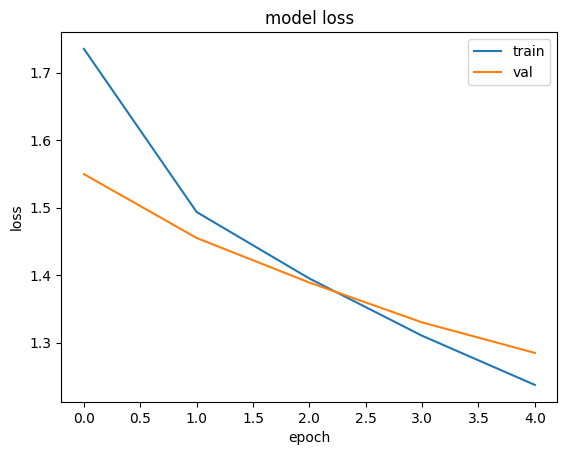

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show

In [ ]:
model.save("summary_model.h5")

# Model building step 2

using pretrained model T5 small

In [58]:
! pip install tensorflow

In [59]:
!pip install transformers==4.33.2
!pip install datasets==2.14.5 evaluate rouge-score
!pip install fsspec==2025.3.0 gcsfs==2025.3.0 --upgrade


  Using cached transformers-4.33.2-py3-none-any.whl.metadata (119 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Using cached transformers-4.33.2-py3-none-any.whl (7.6 MB)
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (tokenizers)
  Using cached fsspec-2023.6.0-py3-none-any.whl.metadata (6.7 kB)
Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninst

# Transformers
A Transformer is a deep learning model architecture, introduced in the paper "Attention is All You Need," that uses a "self-attention" mechanism to process sequential data like text or images. By processing the entire input at once and learning the relevance of different parts of the sequence to each other, it effectively handles long-range dependencies and context, making it a powerful tool for tasks such as machine translation, text generation, and image recognition.

Transformer are built on the encode - decoder arch. where both the encoder and decoder are composed of a series of layer the utilize the sefl attention and feed forward neural network.

Self attention:

self attention is a mechanism that can take a static word  embedding and can generate good contexiual embedding.

Load the model and tokenizer

In [60]:
from transformers import TFT5ForConditionalGeneration,T5Tokenizer
import tensorflow as tf

#  Load PEGASUS model & tokenizer
model_name = "t5-small"  # Best for news summarization
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = TFT5ForConditionalGeneration.from_pretrained(model_name,from_pt=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [61]:
print(model.config)


T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "classifier_dropout": 0.0,
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefix": "summarize: "
    },
    "translation_en_to_de": {
      "early_stopping": true,
      "max_length": 300,
      "num_beams": 4,
      "prefix"

In [ ]:
model.config

PegasusConfig {
  "activation_dropout": 0.1,
  "activation_function": "relu",
  "add_bias_logits": false,
  "add_final_layer_norm": true,
  "architectures": [
    "PegasusForConditionalGeneration"
  ],
  "attention_dropout": 0.1,
  "bos_token_id": 0,
  "classif_dropout": 0.0,
  "classifier_dropout": 0.0,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder_layerdrop": 0.0,
  "decoder_layers": 16,
  "decoder_start_token_id": 0,
  "do_blenderbot_90_layernorm": false,
  "dropout": 0.1,
  "encoder_attention_heads": 16,
  "encoder_ffn_dim": 4096,
  "encoder_layerdrop": 0.0,
  "encoder_layers": 16,
  "eos_token_id": 1,
  "extra_pos_embeddings": 0,
  "force_bos_token_to_be_generated": false,
  "forced_eos_token_id": 1,
  "gradient_checkpointing": false,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "init_std": 0.02,
  "is_encoder_decoder": true,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  

In [67]:
df.head(2)

,cleaned_text,cleaned_summary
0,saurav kant an alumnus of upgrad and iiit b s ...,_START_ upgrad learner switches to career in m...
1,kunal shah s credit card bill payment platform...,_START_ delhi techie wins free food from swigg...


In [68]:
print(df['cleaned_summary'][0])


_START_ upgrad learner switches to career in ml al with 90 salary hike _END_


In [69]:
# drop the start and end text in cleaned_summary column
df['cleaned_summary']=df['cleaned_summary'].apply(lambda x:x.replace('_START_ ',''))
df['cleaned_summary']=df['cleaned_summary'].apply(lambda x:x.replace('_END_',''))

In [70]:
print(df['cleaned_summary'][0])


upgrad learner switches to career in ml al with 90 salary hike 


In [71]:
print(df['cleaned_summary'][10])


up cousins fed human excreta for friendship with boys 


# Full fine tuning

In [72]:
# train test split
from sklearn.model_selection import train_test_split
train_text,val_text,train_summary,val_summary=train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.1,random_state=42)

In [73]:
train_text[0]

'saurav kant an alumnus of upgrad and iiit b s pg program in machine learning and artificial intelligence was a sr systems engineer at infosys with almost 5 years of work experience the program and upgrad s 360 degree career support helped him transition to a data scientist at tech mahindra with 90 salary hike upgrad s online power learning has powered 3 lakh careers'

In [77]:
# calculate the maxlen and max_len output using the 95 percentile method
import numpy as np

def calculate_max_lengths(train_text, val_text, train_summary, val_summary, percentile=95):
    train_input_lens = [len(t.split()) for t in train_text]
    val_input_lens = [len(t.split()) for t in val_text]
    train_output_lens = [len(s.split()) for s in train_summary]
    val_output_lens = [len(s.split()) for s in val_summary]
    max_input_len = int(max(
        np.percentile(train_input_lens, percentile),
        np.percentile(val_input_lens, percentile)
    ))
    max_output_len = int(max(
        np.percentile(train_output_lens, percentile),
        np.percentile(val_output_lens, percentile)
    ))

    print(f" Max input length ({percentile}th percentile): {max_input_len}")
    print(f" Max output length ({percentile}th percentile): {max_output_len}")

    return max_input_len, max_output_len


In [78]:
max_input_len, max_output_len = calculate_max_lengths(
    train_text, val_text, train_summary, val_summary, percentile=95
)


 Max input length (95th percentile): 65
 Max output length (95th percentile): 13


In [79]:
# -------------------------------
# Step 2: Tokenization function
# -------------------------------
def encode_data(texts, summaries, tokenizer, max_input_len=max_input_len, max_output_len=max_output_len):
    input_encodings = tokenizer(
        ["summarize: " + t for t in texts], # because Add task prefix "summarize:" as T5 expects
        max_length=max_input_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    target_encodings = tokenizer(
        list(summaries),
        max_length=max_output_len,
        padding="max_length",
        truncation=True,
        return_tensors="tf"
    )

    labels = target_encodings["input_ids"]
    decoder_input_ids = labels[:, :-1]  # Shift labels to the right for decoder input
# crete a tensorflow dataset()
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            "input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "decoder_input_ids": decoder_input_ids # Include decoder input IDs
        },
        labels[:, 1:] # Shift labels to the left for target
    ))
    return dataset

# -------------------------------
# Step 3: Create train & validation datasets
# -------------------------------
train_dataset = encode_data(train_text, train_summary, tokenizer)
val_dataset = encode_data(val_text, val_summary, tokenizer)

# -------------------------------
# Step 4: Batch, shuffle, prefetch
# -------------------------------
train_dataset = train_dataset.shuffle(1000).batch(4, drop_remainder=True).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(4, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

print("Datasets ready for training!")


TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


Datasets ready for training!


In [80]:
# complie the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [81]:
model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 60506624 (230.81 MB)
Trainable params: 60506624 (230.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model.fit(train_dataset, epochs=2, validation_data=val_dataset)

Epoch 1/2
23103/23103 [==============================] - 1028s 43ms/step - loss: 10.3759 - val_loss: 10.3774
Epoch 2/2
23103/23103 [==============================] - 995s 43ms/step - loss: 10.3759 - val_loss: 10.3774


# partial fine tuning

for partial fine-tuning (also called `parameter-efficient fine-tuning`) is an excellent way to:

 Reduce GPU/VRAM usage

 Train much faster

 Prevent overfitting (especially on small datasets)




 Now we’ll modify it slightly to freeze most of the model layers and train only the top (decoder + output projection) parts.

# What happens in fine-tuning

When you fine-tune a pre-trained model (like T5-small),
you are updating its weights (parameters) using your own dataset.

`But T5 has millions of parameters spread across:`


Encoder layers (understanding input text)

Decoder layers (generating output)

Final linear head (vocabulary projection)

`Training all of them:`

 Takes a long time

 Uses huge GPU memory

 Risks overfitting if your dataset is small

🔹 So what does layer.trainable = False do?

It freezes that layer’s weights.

`That means:`

During training, no gradient is computed for that layer

Its parameters stay fixed — same as in the pre-trained model

It reduces GPU and memory usage drastically

`In other words:`

You’re telling TensorFlow: “Don’t touch these layers — keep their learned knowledge.”

🔹 Then why unfreeze only decoder layers later?

After freezing everything, we selectively unfreeze only a few parts


`That means:`

The encoder (language understanding) stays fixed

The decoder (summary generation logic) learns from your dataset

This is the essence of partial fine-tuning —
you’re adapting only the part that generates output, not the part that already understands language.

🔹 Benefits
Type	GPU Usage	Training Speed	Accuracy (on small data)


```
# Full fine-tune	   High	  Slow	 Strong

Partial fine-tune	 Low	  Fast	 Good enough for small/medium datasets
```



In [83]:
for layer in model.layers:
    layer.trainable = False


In [84]:
for layer in model.layers:
    if "decoder" in layer.name or "lm_head" in layer.name:
        layer.trainable = True

# Optional — sometimes improves learning slightly
if hasattr(model, "final_logits_bias"):
    model.final_logits_bias.trainable = True


In [87]:
# complie the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [88]:
model.summary()

Model: "tft5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  16449536  
                                                                 
 encoder (TFT5MainLayer)     multiple                  35330816  
                                                                 
 decoder (TFT5MainLayer)     multiple                  41625344  
                                                                 
Total params: 76956160 (293.56 MB)
Trainable params: 41625344 (158.79 MB)
Non-trainable params: 35330816 (134.78 MB)
_________________________________________________________________


only train the decoder layer

In [89]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
)


Epoch 1/2
23103/23103 [==============================] - 910s 38ms/step - loss: 10.3759 - val_loss: 10.3774
Epoch 2/2
23103/23103 [==============================] - 864s 37ms/step - loss: 10.3759 - val_loss: 10.3774


# Inference

In [103]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'https?://([^/\s]+).*', r'\1', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def process_text_for_summary(text, tokenizer, max_input_len=512):
    text = clean_text(text)
    inputs = tokenizer(
        "summarize: " + text,
        return_tensors="tf",
        max_length=max_input_len,
        truncation=True,
        padding="max_length"
    )
    return inputs

def generate_summary(inputs, model, tokenizer, max_output_len=150):
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        min_length=10, # Set a minimum length for the summary
        max_length=max_output_len,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print("Generated Summary:", summary)

In [107]:
path="/content/drive/MyDrive/dataset"

In [109]:
model.save_pretrained(path + "/fine_tuned_t5_small")

In [108]:
tokenizer.save_pretrained(path + "/fine_tuned_t5_small")

('/content/drive/MyDrive/dataset/fine_tuned_t5_small/tokenizer_config.json',
 '/content/drive/MyDrive/dataset/fine_tuned_t5_small/special_tokens_map.json',
 '/content/drive/MyDrive/dataset/fine_tuned_t5_small/spiece.model',
 '/content/drive/MyDrive/dataset/fine_tuned_t5_small/added_tokens.json')

In [104]:
# Sample text for testing
sample_text = "This is a long piece of text that needs to be summarized. It contains various sentences and information that should be condensed into a shorter summary."

# Process the sample text
inputs = process_text_for_summary(sample_text, tokenizer, max_input_len)

# Generate and print the summary
generate_summary(inputs, model, tokenizer, max_output_len)

Generated Summary: 


In [114]:
def generate_summary_tf(text, model, tokenizer, max_input_len=512, max_output_len=150):
    # Clean and encode input
    text = clean_text(text)
    inputs = tokenizer(
        "summarize: " + text,
        return_tensors="tf",
        max_length=max_input_len,
        truncation=True,
        padding="max_length"
    )

    # Force int32 tensors for TensorFlow
    input_ids = tf.cast(inputs["input_ids"], tf.int32)
    attention_mask = tf.cast(inputs["attention_mask"], tf.int32)

    # Generate summary (TensorFlow-safe)
    summary_ids = model.generate(
        input_ids=input_ids,
        attention_mask=attention_mask,
        max_length=max_output_len,
        min_length=10,
        num_beams=6,
        repetition_penalty=2.5,
        length_penalty=1.0,
        early_stopping=True,
    )

    # Decode tokens into text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print("\n🧠 Generated Summary:\n", summary if summary.strip() else "[Empty Output]")
    return summary


In [113]:
print(model.trainable_variables[0].numpy().sum())


2013300.9
